In [1]:
import torch
import torch.nn as nn
import imageio
from skimage.transform import rescale
from matplotlib import pyplot as plt
import operator
import numpy as np
import math

In [2]:
device = torch.device('cuda:0')
# Neural Network
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        
        self.encoder = torch.nn.Sequential(
            nn.Linear(D_in, H1),
            nn.ReLU(),
            nn.Linear(H1, D_out)
        )

        self.decoder = torch.nn.Sequential(
            nn.Linear(D_out, H1),
            nn.ReLU(),
            nn.Linear(H1, D_in),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [3]:
model = torch.load("../data/models/ae_x2_psnr.pt")
model.eval()
model.cuda()

autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=3600, out_features=2000, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2000, out_features=900, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=900, out_features=2000, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2000, out_features=3600, bias=True)
    (3): Sigmoid()
  )
)

In [4]:
model.decoder

Sequential(
  (0): Linear(in_features=900, out_features=2000, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2000, out_features=3600, bias=True)
  (3): Sigmoid()
)

(150, 150, 3)


/home/alex/.conda/envs/super-scaler/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


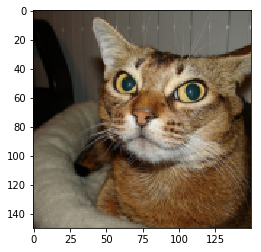

In [5]:
image_file = "../data/CAT_00/00000001_020.jpg"
img = imageio.imread(image_file)
image_target_size = (150, 150)

if img.shape[0] <= img.shape[1]:
    xy = img.shape[0]
else:
    xy = img.shape[1]
if xy > image_target_size[0]:
    img = rescale(image=img, scale=image_target_size[0]/xy, multichannel=True, anti_aliasing=True)
        
def cropND(img, image_target_size):
    start = tuple(map(lambda a, da: a//2-da//2, img.shape, image_target_size))
    end = tuple(map(operator.add, start, image_target_size))
    slices = tuple(map(slice, start, end))
    return img[slices]

img = cropND(img, image_target_size)
print(img.shape)
plt.imshow(img, interpolation='none')
plt.show()

In [6]:
def reshape_img_to_vec(img):
    return img.reshape(img.shape[0]*img.shape[1], 3)

img_vec = reshape_img_to_vec(img)
img_vec.shape

(22500, 3)

In [7]:
image_chop = 25
img_vec = img_vec.reshape(int(1 * image_chop), int(img_vec.shape[0] / image_chop), 3)
img_vec.shape

(25, 900, 3)

In [8]:
x = torch.tensor(img_vec, dtype = torch.float32, device = device).transpose(1,2)

In [9]:
x.shape

torch.Size([25, 3, 900])

In [10]:
up_scaled = model.decoder(x).transpose(1,2)

In [11]:
up_scaled.shape

torch.Size([25, 3600, 3])

In [12]:
up_scaled = up_scaled.cpu().detach().numpy()

In [13]:
up_scaled.shape

(25, 3600, 3)

In [14]:
up_scaled.transpose(0,1,2).reshape(-1,3).shape

(90000, 3)

In [15]:
up_img = up_scaled.reshape(300, 300, 3)

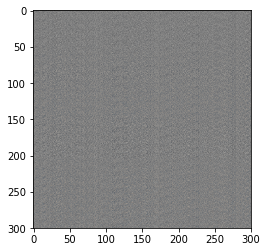

In [16]:
plt.imshow(up_img, interpolation='none')
plt.show()

In [17]:
up_img

array([[[0.48849168, 0.48858148, 0.48933133],
        [0.49884492, 0.49963978, 0.5003116 ],
        [0.5092973 , 0.50913507, 0.50783664],
        ...,
        [0.50883627, 0.5082961 , 0.50616527],
        [0.5202745 , 0.5208359 , 0.5201752 ],
        [0.49688104, 0.49599966, 0.4949651 ]],

       [[0.5392527 , 0.53721476, 0.5337784 ],
        [0.4885799 , 0.4916651 , 0.4949044 ],
        [0.50212324, 0.5006755 , 0.49869213],
        ...,
        [0.53134143, 0.53067386, 0.52725047],
        [0.52682424, 0.52507687, 0.52337253],
        [0.470652  , 0.47246906, 0.47614726]],

       [[0.52143687, 0.5194713 , 0.51635396],
        [0.5133533 , 0.51048   , 0.50766486],
        [0.50708824, 0.5070479 , 0.50587475],
        ...,
        [0.53834444, 0.5395486 , 0.5370808 ],
        [0.49355924, 0.49369752, 0.49472684],
        [0.44051403, 0.44214126, 0.44753388]],

       ...,

       [[0.5192428 , 0.51386535, 0.5088205 ],
        [0.49375245, 0.49325892, 0.4937519 ],
        [0.50999236, 0